In [110]:
import mlrose
import numpy as np
import matplotlib.pyplot as plt
import time
import math
np.random.seed(3)
from random import randint

# Create list of city coordinates
#coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3),(5,6),(4,8),(8,8),(9,7)]
NUM_OF_COORDS=50
coords = [(randint(1,NUM_OF_COORDS),randint(1,NUM_OF_COORDS)) for i in range(1,NUM_OF_COORDS)]
edges= list(set(coords))
print(edges)
#edges = [(0, 1), (0, 2), (0, 4), (1, 3), (2, 0), (2, 3), (3, 4)]
random_start = np.random.rand(100)
starting_state = np.where(random_start>0.5, 1, 0)

fitness = mlrose.MaxKColor(edges)
problem_fit = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness, maximize = False, max_val = 2)

[(50, 34), (49, 42), (1, 26), (42, 38), (1, 17), (13, 37), (23, 41), (4, 27), (46, 47), (24, 33), (13, 21), (20, 48), (32, 33), (32, 20), (40, 33), (31, 47), (22, 16), (34, 32), (7, 10), (44, 16), (18, 31), (33, 11), (35, 36), (38, 41), (3, 33), (36, 13), (13, 28), (49, 23), (35, 16), (19, 42), (8, 26), (50, 33), (25, 10), (15, 45), (38, 39), (37, 37), (17, 39), (16, 34), (8, 31), (19, 5), (48, 23), (45, 28), (30, 17), (15, 40), (32, 36), (17, 48), (45, 10), (32, 23)]


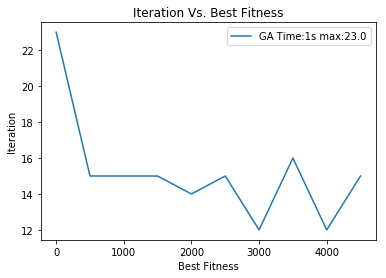

In [111]:
# Set random seed
np.random.seed(2)
NUM_TIMES_TO_RUN=1
MAX_ITERATION=5000
sum_best_fitness_list=np.array([0,0])
t0 = time.clock()
for i in range(NUM_TIMES_TO_RUN):
    best_fitness_list = []
    for i in range(1, MAX_ITERATION, 500):
    # Solve problem using the genetic algorithm
        best_state, best_fitness = mlrose.genetic_alg(problem_fit, pop_size=10, mutation_prob=0.1, \
        max_attempts = 50, max_iters = i)
        #print(i)
        #print(best_state)
        best_fitness_list.append([i, best_fitness])
    #print(best_fitness_list)
    sum_best_fitness_list = sum_best_fitness_list + np.array(best_fitness_list)
#sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)
avg_best_fitness_GA= sum_best_fitness_list/NUM_TIMES_TO_RUN
time_taken_GA=str(math.ceil((time.clock()-t0)/(NUM_TIMES_TO_RUN)))
maxValueGA= str(max(avg_best_fitness_GA[:,1]))
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
plt.plot(avg_best_fitness_GA[:,0], avg_best_fitness_GA[:,1], label='GA Time:'+time_taken_GA+"s max:"+maxValueGA)
plt.title('Iteration Vs. Best Fitness')
plt.legend()
plt.show()


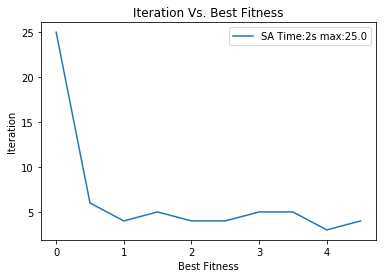

In [112]:
# Set random seed
np.random.seed(2)
NUM_TIMES_TO_RUN=1
MAX_ITERATION=5000
sum_best_fitness_list=np.array([0,0])
t0 = time.clock()
for i in range(NUM_TIMES_TO_RUN):
    best_fitness_list = []
    for i in range(1, MAX_ITERATION, 500):
    # Solve problem using the genetic algorithm
        best_state, best_fitness = mlrose.simulated_annealing(problem_fit, schedule=mlrose.ExpDecay(),
        max_iters = i, init_state = starting_state)      #print(i)
        #print(best_state)
        best_fitness_list.append([i, best_fitness])
    #print(best_fitness_list)
    sum_best_fitness_list = sum_best_fitness_list + np.array(best_fitness_list)
#     sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)
avg_best_fitness_SA= sum_best_fitness_list/NUM_TIMES_TO_RUN
time_taken_SA=str(math.ceil((time.clock()-t0)/(NUM_TIMES_TO_RUN)))

maxValueSA= str(max(avg_best_fitness_SA[:,1]))
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
plt.plot(avg_best_fitness_SA[:,0]/1000, avg_best_fitness_SA[:,1], label='SA Time:'+time_taken_SA+"s max:"+maxValueSA)
plt.title('Iteration Vs. Best Fitness')
plt.legend()
plt.show()


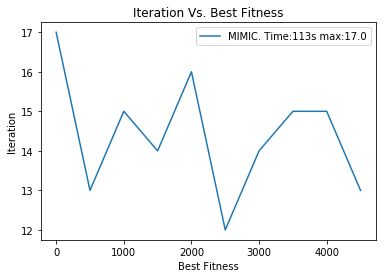

In [113]:
# Set random seed
np.random.seed(2)
NUM_TIMES_TO_RUN=1
MAX_ITERATION=5000
sum_best_fitness_list=np.array([0,0])
t0 = time.clock()
for i in range(NUM_TIMES_TO_RUN):
    best_fitness_list = []
    for i in range(1, MAX_ITERATION, 500):
    # Solve problem using the genetic algorithm
        best_state, best_fitness = mlrose.mimic(problem_fit, pop_size=30, keep_pct=0.2,\
            max_attempts = 1, max_iters = i)        #print(i)
        #print(best_state)
        best_fitness_list.append([i, best_fitness])
    #print(best_fitness_list)
    sum_best_fitness_list = sum_best_fitness_list + np.array(best_fitness_list)
#     sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)
avg_best_fitness_MIMIC= sum_best_fitness_list/NUM_TIMES_TO_RUN
time_taken_MIMIC=str(math.ceil((time.clock()-t0)/(NUM_TIMES_TO_RUN)))
maxValueMIMIC= str(max(avg_best_fitness_MIMIC[:,1]))

plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
#plt.plot(avg_best_fitness_GA[:,0], avg_best_fitness_GA[:,1], label='GA. Wall Time:'+time_taken_GA)
#plt.plot(avg_best_fitness_SA[:,0], avg_best_fitness_SA[:,1], label='SA. Wall Time:'+time_taken_SA)
plt.plot(avg_best_fitness_MIMIC[:,0], avg_best_fitness_MIMIC[:,1], label='MIMIC. Time:'+time_taken_MIMIC+"s max:"+maxValueMIMIC)
plt.title('Iteration Vs. Best Fitness')
plt.legend()
plt.show()


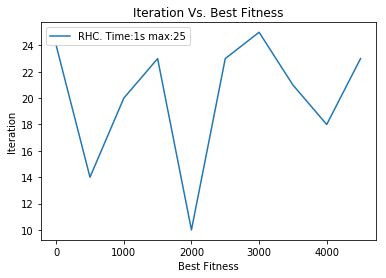

In [114]:
# Set random seed
np.random.seed(2)
NUM_TIMES_TO_RUN=1
MAX_ITERATION=5000
sum_best_fitness_list=np.array([0,0])
t0 = time.clock()
for i in range(NUM_TIMES_TO_RUN):
    best_fitness_list = []
    for i in range(1, MAX_ITERATION, 500):
    # Solve problem using the genetic algorithm
        best_state, best_fitness = mlrose.random_hill_climb(problem_fit, max_iters=i)
        #print(i)
        #print(best_state)
        best_fitness_list.append([i, best_fitness])
    #print(best_fitness_list)
    sum_best_fitness_list = sum_best_fitness_list + np.array(best_fitness_list)
#     sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)
avg_best_fitness_RHC= sum_best_fitness_list/NUM_TIMES_TO_RUN
time_taken_RHC=str(math.ceil((time.clock()-t0)/(NUM_TIMES_TO_RUN)))
maxValueRHC= str(math.ceil(max(avg_best_fitness_RHC[:,1])))
#print(avg_best_fitness_RHC)
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
#plt.plot(avg_best_fitness_GA[:,0], avg_best_fitness_GA[:,1], label='GA. Wall Time:'+time_taken_GA)
#plt.plot(avg_best_fitness_SA[:,0], avg_best_fitness_SA[:,1], label='SA. Wall Time:'+time_taken_SA)
plt.plot(avg_best_fitness_RHC[:,0], avg_best_fitness_RHC[:,1], label='RHC. Time:'+time_taken_RHC+"s max:"+maxValueRHC)
plt.title('Iteration Vs. Best Fitness')
plt.legend()
plt.show()


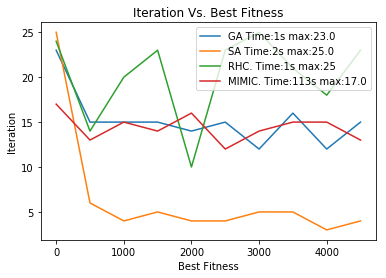

In [115]:
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
plt.plot(avg_best_fitness_GA[:,0], avg_best_fitness_GA[:,1], label='GA Time:'+time_taken_GA+"s max:"+maxValueGA)
plt.plot(avg_best_fitness_SA[:,0], avg_best_fitness_SA[:,1], label='SA Time:'+time_taken_SA+"s max:"+maxValueSA)
plt.plot(avg_best_fitness_RHC[:,0], avg_best_fitness_RHC[:,1], label='RHC. Time:'+time_taken_RHC+"s max:"+maxValueRHC)
plt.plot(avg_best_fitness_MIMIC[:,0], avg_best_fitness_MIMIC[:,1], label='MIMIC. Time:'+time_taken_MIMIC+"s max:"+maxValueMIMIC)
plt.title('Iteration Vs. Best Fitness')
plt.legend()
plt.show()